<a href="https://colab.research.google.com/github/juliosaopedro/Meus_Projetos/blob/master/Metricas_Doencas_Cardiovasculares_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.


<H2> Obtenção dos Dados </H2>

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).


### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test* é um exame de imagem nuclear que mostra como o sangue flui para o coração enquanto você se exercita ou em repouso. O *Thalium* é um elemento químico radioativo.
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)
  

### Aplicando algumas métricas de avaliação de nossos modelos

#### Regressão Linear Múltipla 


In [0]:
# importando os pacotes necessários

# Para os dataframes
import pandas as pd

# Para os gráficos
import matplotlib.pyplot as plt

# Para um layout mais amigável
import seaborn as sns


In [0]:
# aplicando o layout mais amigável
sns.set_style()

In [0]:
# definindo url do dataset
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"


# criando o dataframe
df = pd.read_csv(dataset_uci)


In [4]:
# nossas primeiras linhas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [7]:
# verificando nossa alteracao
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [8]:
# Quantidades antes da atualização
df.thal.value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [0]:
# converter valores 3 para 0
df.loc[df.thal == 3, 'thal'] = 0

# converter valores 6 ou 7 para 1
df.loc[df.thal == 6, 'thal'] = 1
df.loc[df.thal == 7, 'thal'] = 1

In [10]:
# Quantidades apos a atualização
df.thal.value_counts()

0.0    168
1.0    135
Name: thal, dtype: int64

In [0]:
# importando pacotes para inferir informaçoes a partir dos modelos de regressão linear
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [0]:
# definindo nossas features e nosso alvo

X = df.drop('num', axis=1)
y = df.num


In [13]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,1.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0.0


In [14]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

## Criando o Modelo de Machine Learning - Regressão Linear

In [0]:
# dividindo o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# criar e treinar um modelo de Regressão Linear
rlm_model = LinearRegression()
rlm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# vendo nossos dados
print("df:\t\t",df.shape)

print("X:\t\t",X.shape)

print("y:\t\t", y.shape)

df:		 (303, 14)
X:		 (303, 13)
y:		 (303,)


In [18]:
# imprimir os coeficientes
print("Coeficiente:\t", rlm_model.coef_)
print("Intercepto:\t", rlm_model.intercept_)


Coeficiente:	 [ 0.00038325  0.18698843  0.07401752  0.00183134  0.00070979 -0.03063728
  0.01763148 -0.00202772  0.14528368  0.03518818  0.04969082  0.17114585
  0.17703978]
Intercepto:	 -0.4041651847589855


In [0]:
# previsões em cima do dataset de teste
y_pred = rlm_model.predict(X_test)

In [20]:
# verificar desempenho do modelo
# R2 Score
print("R2 Score:\t", r2_score(y_test, y_pred)*100)


R2 Score:	 51.3075386903604


O <b>R2 Score</b> é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. Também é conhecido como coeficiente de determinação ou coeficiente de determinação múltipla para regressão múltipla. 

O <b>R2 Score</b> está sempre entre 0 e 100%:

0% indica que o modelo não explica nenhuma variabilidade dos dados de resposta em torno de sua média.
100% indica que o modelo explica toda a variabilidade dos dados de resposta em torno de sua média.
Em geral, quanto maior o quadrado R, melhor o modelo se ajusta aos seus dados.

In [21]:
# Métrica MAE - Erro absoluto médio
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))


MAE:		 0.2802340689348339


Em estatística, o erro absoluto médio <b>(MAE)</b> é uma medida da diferença entre duas variáveis contínuas. Suponha que X e Y são variáveis de observações emparelhadas que expressam o mesmo fenômeno. Exemplos de Y versus X incluem comparações de tempo previsto versus observado, tempo subsequente versus tempo inicial e uma técnica de medição versus uma técnica alternativa de medição. Considere um gráfico de dispersão de n pontos, onde o ponto i tem coordenadas (xi, yi) ... O Erro Absoluto Médio <b>(MAE)</b> é a distância vertical média entre cada ponto e a linha de identidade. <b>MAE</b> também é a distância horizontal média entre cada ponto e a linha de identidade.

In [22]:
# Métrica MSE - Erro da média ao quadrado
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

MSE:		 0.12164685192141611


O<b> MSE </b> mede basicamente o erro quadrado médio de nossas previsões. Para cada ponto, calcula a diferença quadrada entre as previsões e o destino e, em seguida, calcula a média desses valores.
Quanto maior esse valor, pior o modelo. Isso nunca é negativo, pois estamos corrigindo os erros individuais de previsão antes de somar, mas seria zero para um modelo perfeito.

<b>Vantagem</b>: Útil se tivermos valores inesperados com os quais devemos nos preocupar. Muito alto ou baixo valor que devemos prestar atenção.

<b>Desvantagem</b>: se fizermos uma única previsão muito ruim, a quadratura tornará o erro ainda pior e poderá distorcer a métrica para superestimar a maldade do modelo. Esse é um comportamento particularmente problemático se tivermos dados ruidosos (ou seja, dados que por qualquer motivo não sejam totalmente confiáveis) - até mesmo um modelo “perfeito” pode ter um MSE alto nessa situação, tornando difícil julgar quão bem o modelo está executando. Por outro lado, se todos os erros forem pequenos, ou melhor, menores que 1, o efeito oposto será sentido: podemos subestimar a maldade do modelo.

Observe que, se queremos ter uma previsão constante, a melhor será o valor médio dos valores desejados.

#### Regressão Logística ####


In [0]:
# importando os pacotes necessários

# Para os dataframes
import pandas as pd

# Para os gráficos
import matplotlib.pyplot as plt

# Para um layout mais amigável
import seaborn as sns

In [0]:
# definindo url do dataset
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"


# criando o dataframe
df = pd.read_csv(dataset_uci)



In [0]:
# tratando nossos dados
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [0]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# metricas

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


## Criando o Modelo de Machine Learning - Regressão Logística


In [0]:
# dividindo nosso dataset em treino e teste
#Treino

X = df.drop('num', axis = 1 )

In [0]:
y = df['num']

In [0]:
# dividindo o dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [30]:
# criando nosso modelo de Regressao Logistica
ml_model = LogisticRegression(C=0.01, random_state=42);
# treinando nosso modelo
ml_model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# previsoes e probabilidades
y_pred = ml_model.predict(X_test)

y_proba = ml_model.predict_proba(X_test)

# imprimindo 
print(y_pred[:5])

print(y_proba[:5])

[0 1 0 0 1]
[[0.73159601 0.26840399]
 [0.37585654 0.62414346]
 [0.54009507 0.45990493]
 [0.51417232 0.48582768]
 [0.3108357  0.6891643 ]]


In [32]:
# acuracia do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        51
           1       0.86      0.76      0.80        49

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



<b>precision</b>

É a capacidade de um classificador de não rotular uma instância de positiva como realmente negativa. Para cada classe, é definida como a razão entre os verdadeiros positivos e a soma dos verdadeiros e falsos positivos. Dito de outra maneira, "para todos os casos classificados como positivos, qual porcentagem estava correta?"


<b>recall</b>

Lembre-se é a capacidade de um classificador encontrar todas as instâncias positivas. Para cada classe, é definida como a razão entre os verdadeiros positivos e a soma dos verdadeiros positivos e falsos negativos. Dito de outra maneira, "para todas as instâncias que foram realmente positivas, qual porcentagem foi classificada corretamente?"


<b>f1-score</b>

É uma média harmônica ponderada de precisão e recordação, de modo que a melhor pontuação seja 1,0 e a pior seja 0,0. De um modo geral, as pontuações f1 são menores que as medidas de precisão, à medida que incorporam precisão e recuperação em seu cálculo. Como regra geral, a média ponderada de f1 deve ser usada para comparar modelos de classificadores, não a precisão global.


<b>support</b>

É o número de ocorrências reais da classe no conjunto de dados especificado. O suporte desequilibrado nos dados de treinamento pode indicar fraquezas estruturais nas pontuações relatadas do classificador e pode indicar a necessidade de amostragem estratificada ou reequilíbrio. O suporte não muda entre os modelos, mas sim diagnostica o processo de avaliação.

In [0]:
# matriz de confusao
import seaborn as sns
import matplotlib.pyplot as plt


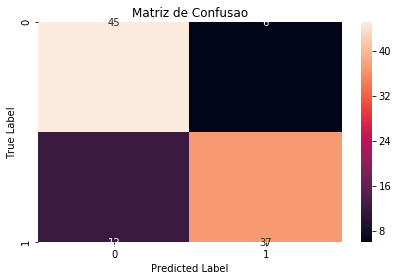

In [34]:
# configurando nossa matriz de confusao
fig, ax=plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusao")
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()

##### Matriz de confusão #####
É um tabela que mostra as frequências de classificação para cada classe do modelo. Pegando o exemplo acima, ela vai nos mostrar as frequências:

<li><b>Verdadeiro positivo (true positive — TP)</b>: ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. Por exemplo, quando a mulher está grávida e o modelo previu corretamente que ela está grávida.</li>
<li><b>Falso positivo (false positive — FP)</b>: ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. Exemplo: a mulher não está grávida, mas o modelo disse que ela está.</li>
<li><b>Falso verdadeiro (true negative — TN)</b>: ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. Exemplo: a mulher não estava grávida, e o modelo previu corretamente que ela não está.</li>
<li><b>Falso negativo (false negative — FN)</b>: ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. Por exemplo, quando a mulher está grávida e o modelo previu incorretamente que ela não está grávida.

#### Arvore de Decisão ####

Uma árvore de decisão é um gráfico semelhante a uma árvore com nós que representam o local em que escolhemos um atributo e fazemos uma pergunta; arestas representam as respostas para a pergunta; e as folhas representam a saída real ou o rótulo da classe. Eles são usados ​​na tomada de decisão não linear com superfície de decisão linear simples.

As árvores de decisão classificam os exemplos, classificando-os da árvore da raiz para algum nó folha, com o nó folha fornecendo a classificação para o exemplo. Cada nó na árvore atua como um caso de teste para algum atributo, e cada aresta descendente desse nó corresponde a uma das respostas possíveis para o caso de teste. Esse processo é de natureza recursiva e é repetido para cada subárvore enraizada nos novos nós.

In [0]:
# importando os pacotes necessários

# Para os dataframes
import pandas as pd

# Para os gráficos
import matplotlib.pyplot as plt

# Para um layout mais amigável
import seaborn as sns

In [0]:
# definindo url do dataset
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"


# criando o dataframe
df = pd.read_csv(dataset_uci)

In [0]:
# tratando nossos dados
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [0]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

# metricas

from sklearn.metrics import accuracy_score


## Criando o Modelo de Machine Learning - Árvore de Decisão

In [0]:
# dividindo nosso dataset em treino e teste
#Treino

X = df.drop('num', axis = 1 )

In [0]:
y = df['num']

In [0]:
# dividindo o dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [42]:
# criando o modelo
dt_model = DecisionTreeClassifier(max_depth=8, criterion='entropy', max_features=10,random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [43]:
# previsões
y_pred = dt_model.predict(X_test)

# obtendo nossa acuracia
print("\nAccuracy Score")
print(accuracy_score(y_test, y_pred))


Accuracy Score
0.6842105263157895


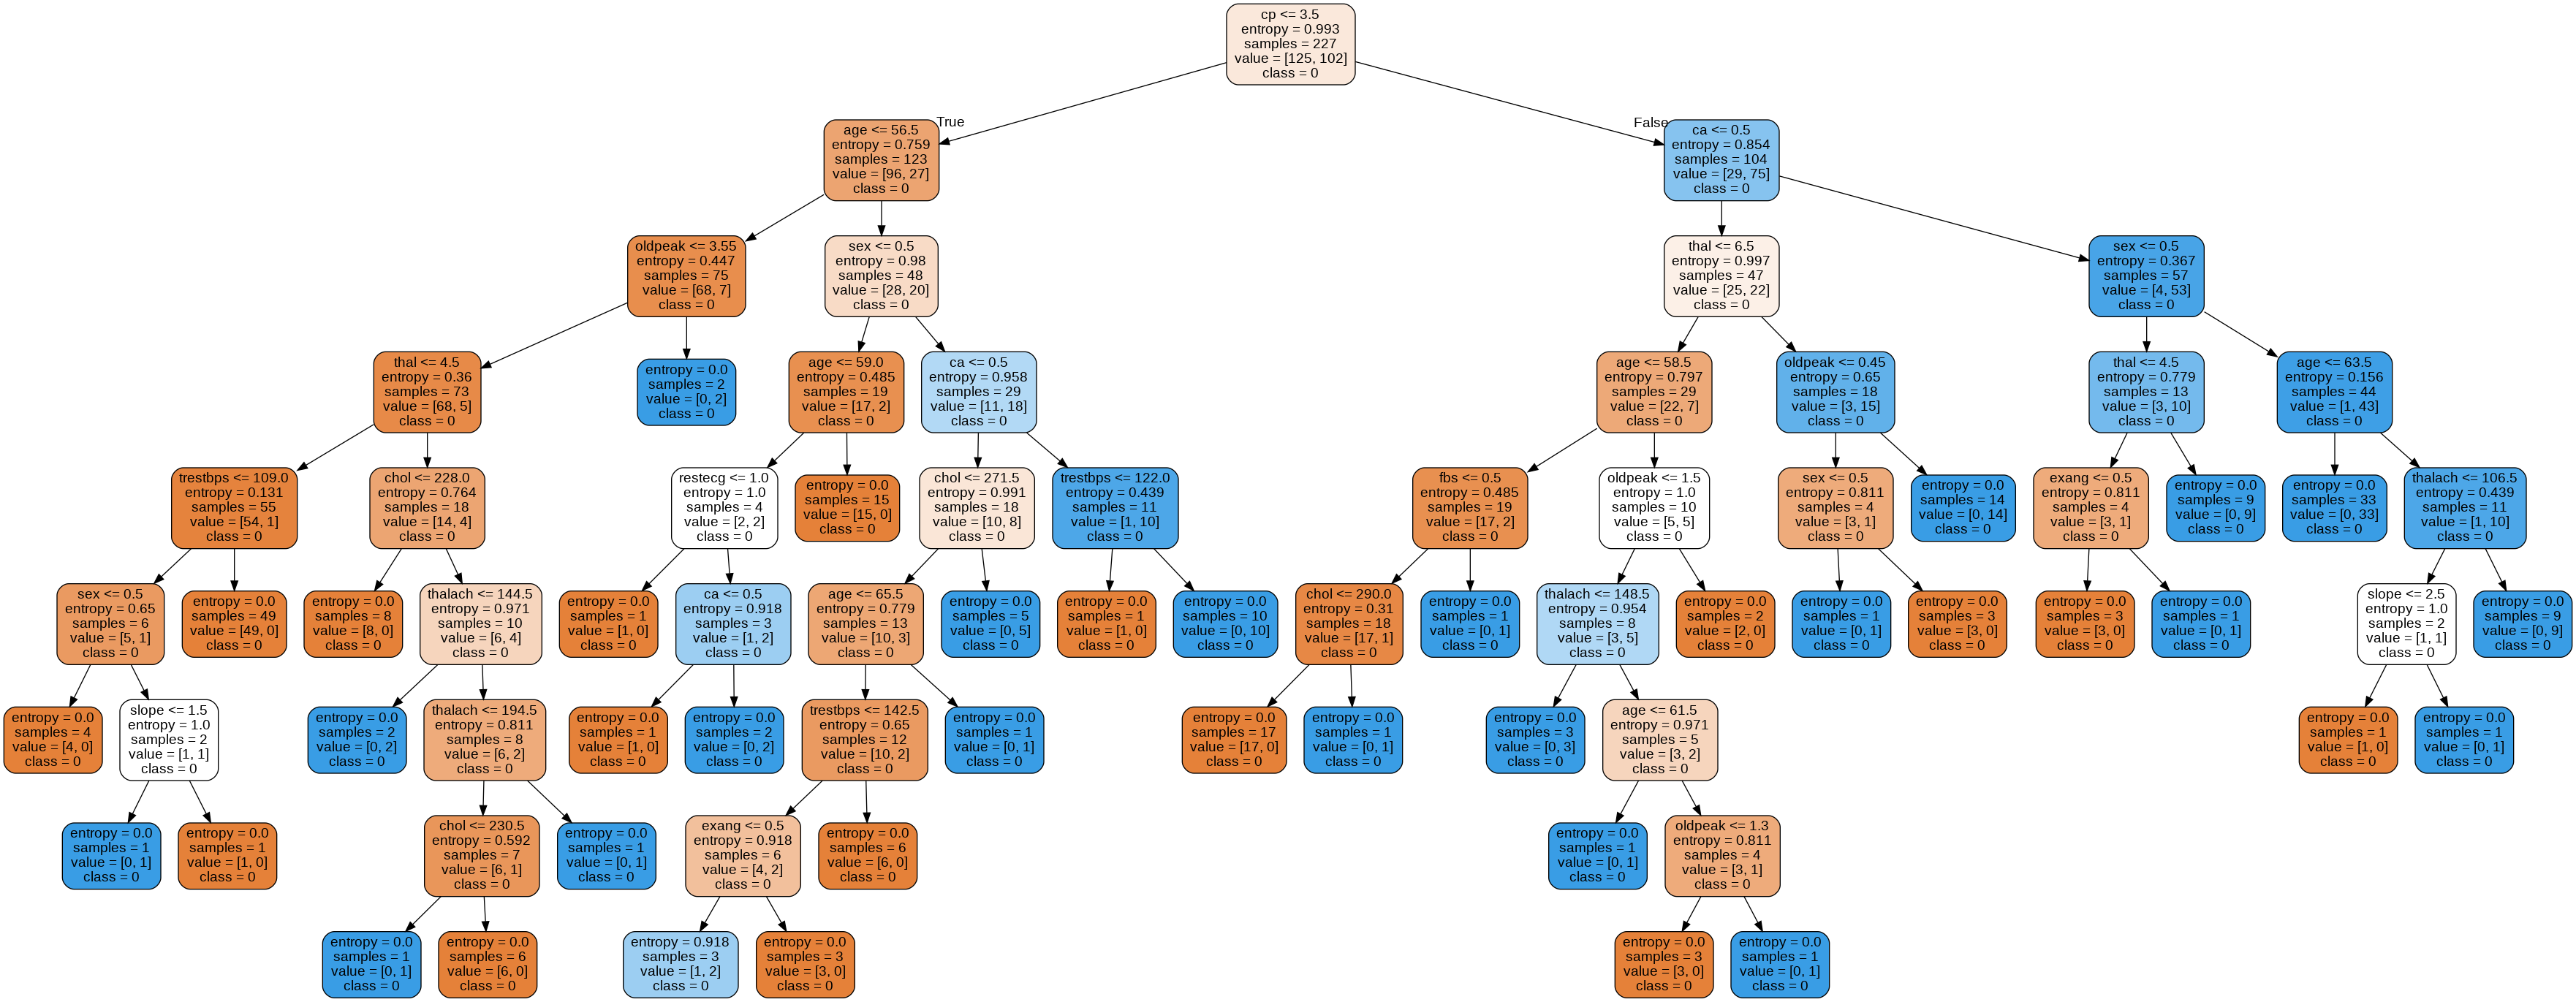

In [44]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot = export_graphviz(dt_model, filled=True, rounded=True, feature_names=X.columns, class_names=['0','0'])

graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

#### XGBoost 

O XGBoost é uma biblioteca otimizada de aumento de gradiente distribuído, projetada para ser altamente eficiente, flexível e portátil. Ele implementa algoritmos de aprendizado de máquina sob a estrutura Gradient Boosting. O XGBoost fornece um aumento de árvore paralelo (também conhecido como GBDT, GBM) que resolve muitos problemas de ciência de dados de maneira rápida e precisa. 

In [0]:
# importando os pacotes necessários

# Para os dataframes
import pandas as pd

# Para os gráficos
import matplotlib.pyplot as plt

# Para um layout mais amigável
import seaborn as sns

# XGBoost
from xgboost import XGBClassifier

# Split treino e teste
from sklearn.model_selection import train_test_split

# metricas
from sklearn.metrics import accuracy_score

# configurar o gráfico
sns.set_style()



In [0]:
# definindo url do dataset
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"


# criando o dataframe
df = pd.read_csv(dataset_uci)

In [0]:
# tratando nossos dados
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

## Criando o Modelo de Machine Learning - XGBoost

In [0]:
# dividindo nosso dataset em treino e teste
#Treino

X = df.drop('num', axis = 1 )

In [0]:
y = df['num']

In [0]:
# dividindo o dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [51]:
# criando nosso modelo
ml_model = XGBClassifier(learning_rate=0.05, n_estimators=1000, max_depth=3, subsample=0.9, colsample_bytree=0.1, gamma=1, random_state=42)
ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

In [52]:
# previsoes
y_pred = ml_model.predict(X_test)

#Acuracia do modelo
print(accuracy_score(y_test,y_pred))

0.8552631578947368


# **Avaliação dos Modelos de Machine Learning** 

#### *Regressão Linear Múltipla*

> R2 Score = 51,30 %


#### *Regressão Logística*

> Acurácia = 82 %


#### *Árvore de Decisão*

> Acurácia = 68 %


#### *XGBoost*

> Acurária = 85 %


